In [119]:
import pandas as pd
import matplotlib.pyplot as plt

In [106]:
df = pd.read_csv('people.txt', sep=' ')
df

,Age,agegroup,height,status,yearsmarried
0,21,adult,6.0,single,-1
1,2,child,3.0,married,0
2,18,adult,5.7,married,20
3,221,elderly,5.0,widowed,2
4,34,child,-7.0,married,3


In [137]:
f1,f2,f3,f4=True,True,True,True

In [107]:
def check_age_range(df):
    age_range = lambda x : x in range(151)
    return df["Age"].apply(age_range)

In [108]:
check_age_range(df)

0     True
1     True
2     True
3    False
4     True
Name: Age, dtype: bool

In [109]:
def check_age(df):
    age_validity = lambda x : x[0] > x[1]
    return df[["Age", "yearsmarried"]].apply(age_validity, axis=1)

In [110]:
check_age(df)

0     True
1     True
2    False
3     True
4     True
dtype: bool

In [111]:
def check_status(df):
    status_set = set(df.status)
    status = lambda x : x in status_set
    return df["status"].apply(status)

In [112]:
check_status(df)

0    True
1    True
2    True
3    True
4    True
Name: status, dtype: bool

In [113]:
def check_group_help(x) :
        if (x[0] in range(18) and x[1]=="child") or (x[0] in range(18,66) and x[1]=="adult") or (x[0]>65 and x[1]=="elderly")  :
            return True
        else :
            return False

In [114]:
def check_group(df):
    return df[["Age", "agegroup"]].apply(check_group_help, axis=1)

In [115]:
check_group(df)

0     True
1     True
2     True
3     True
4    False
dtype: bool

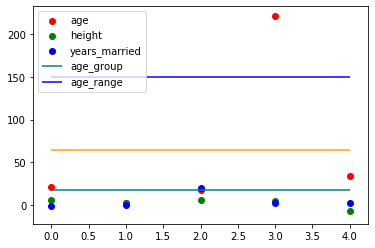

In [135]:
plt.scatter(df.index, df["Age"].values, c="red", label="age")
plt.scatter(df.index, df["height"].values, c="green", label="height")
plt.scatter(df.index, df["yearsmarried"].values, c="blue", label="years_married")
plt.hlines([18, 65], 0, 4, label="age_group", colors=["#008080", "orange"])
plt.hlines(150, 0, 4, label="age_range", colors="blue")
plt.legend()

In [118]:
rule_set = {"check_age_range" : check_age_range, "check_age" : check_age, "check_status": check_status, "check_group" : check_group}
x = [True] * 5
for i in rule_set:
    # print(rule_set[i](df))
    x = x & (rule_set[i](df))
x

0     True
1     True
2    False
3    False
4    False
dtype: bool